In [ ]:
import os
import csv
import cv2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
from google.colab.patches import cv2_imshow
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [ ]:
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Path to CSV file
csv_file = "/content/drive/MyDrive/landmark_data.csv"

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file)

# Display the DataFrame
df.head()

,Path,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x77,y77,x78,y78,x79,y79,x80,y80,x81,y81
0,/content/drive/MyDrive/Dataset Asli/Oval/oval ...,65,123,67,146,71,167,76,189,84,...,76,57,66,105,242,101,221,59,179,52
1,/content/drive/MyDrive/Dataset Asli/Oval/oval ...,51,125,53,150,56,174,60,197,67,...,81,43,52,113,235,129,224,64,191,38
2,/content/drive/MyDrive/Dataset Asli/Oval/oval ...,62,138,66,161,73,184,80,206,90,...,68,59,60,121,243,98,218,47,175,39
3,/content/drive/MyDrive/Dataset Asli/Oval/oval ...,59,122,61,147,64,172,69,197,77,...,81,48,61,105,245,107,227,56,189,42
4,/content/drive/MyDrive/Dataset Asli/Oval/oval ...,59,131,60,156,65,181,71,207,79,...,65,42,56,109,263,95,236,38,184,28


In [ ]:
print(f"Jumlah baris: {df.shape[0]}")

Jumlah baris: 8412


In [ ]:
import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the landmark data from the CSV file
data = pd.read_csv(csv_file)
data = data.head(3500)

# Split the data into features (X) and target (y)
X = []
y = []

count = 0
for index, row in data.iterrows():
    count += 1
    print(count/8412)
    image_path = row['Path']
    landmarks = row.drop('Path').values.astype(np.float32)
    
    # Load and preprocess the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image / 255.0
    
    X.append(image)
    y.append(landmarks)

0.00011887779362815027
0.00023775558725630053
0.0003566333808844508
0.00047551117451260106
0.0005943889681407513
0.0007132667617689016
0.0008321445553970519
0.0009510223490252021
0.0010699001426533524
0.0011887779362815027
0.001307655729909653
0.0014265335235378032
0.0015454113171659534
0.0016642891107941037
0.001783166904422254
0.0019020446980504042
0.0020209224916785543
0.0021398002853067048
0.002258678078934855
0.0023775558725630053
0.0024964336661911554
0.002615311459819306
0.002734189253447456
0.0028530670470756064
0.0029719448407037564
0.003090822634331907
0.003209700427960057
0.0033285782215882074
0.0034474560152163575
0.003566333808844508
0.003685211602472658
0.0038040893961008085
0.0039229671897289585
0.004041844983357109
0.0041607227769852595
0.0042796005706134095
0.00439847836424156
0.00451735615786971
0.0046362339514978606
0.004755111745126011
0.004873989538754161
0.004992867332382311
0.005111745126010462
0.005230622919638612
0.005349500713266762
0.005468378506894912
0.0055

In [ ]:
X = np.array(X)
y = np.array(y)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to match the expected shape for CNN (add channel dimension)
X_train = X_train.reshape(X_train.shape + (1,))
X_val = X_val.reshape(X_val.shape + (1,))

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.05))
model.add(Dense(162))  # Output layer with 162 nodes (2 coordinates per landmark)

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Define the ModelCheckpoint callback to save the best model
checkpoint = ModelCheckpoint("Arvigo_Landmark81_coba_v1.h5", monitor='val_loss', save_best_only=True, mode='min')

# Train the model with the callback
history = model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_data=(X_val, y_val), callbacks=[checkpoint])

Epoch 1/1000
88/88 [==============================] - 5s 39ms/step - loss: 2415.8728 - val_loss: 252.0967
Epoch 2/1000
88/88 [==============================] - 3s 36ms/step - loss: 227.1001 - val_loss: 76.1034
Epoch 3/1000
88/88 [==============================] - 2s 20ms/step - loss: 178.1136 - val_loss: 82.0987
Epoch 4/1000
88/88 [==============================] - 5s 60ms/step - loss: 156.6365 - val_loss: 72.9248
Epoch 5/1000
88/88 [==============================] - 2s 20ms/step - loss: 132.7672 - val_loss: 212.4099
Epoch 7/1000
88/88 [==============================] - 3s 36ms/step - loss: 144.0595 - val_loss: 65.3362
Epoch 8/1000
88/88 [==============================] - 2s 20ms/step - loss: 114.2773 - val_loss: 69.3833
Epoch 9/1000
88/88 [==============================] - 2s 20ms/step - loss: 109.5836 - val_loss: 68.3583
Epoch 10/1000
88/88 [==============================] - 3s 35ms/step - loss: 97.2476 - val_loss: 45.9650
Epoch 11/1000
88/88 [==============================] - 2s 20m

KeyboardInterrupt: ignored

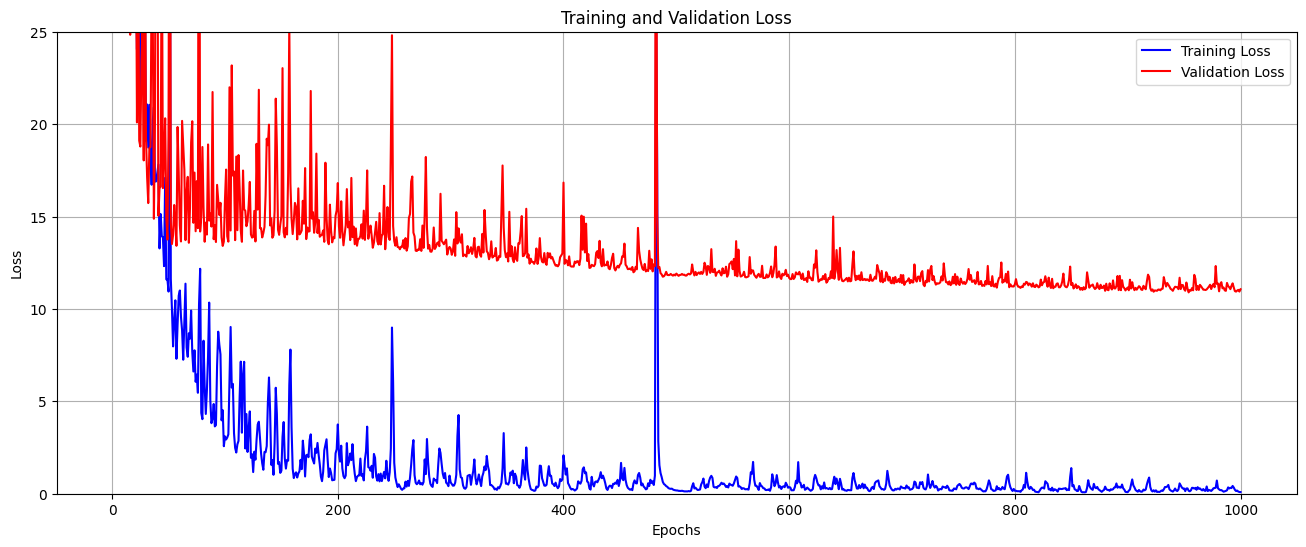

In [ ]:
# Get training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)
plt.figure(figsize=(16, 6))
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 25)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model = load_model('Arvigo_Landmark81.h5')

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Evaluate the model on the validation set and retrieve the validation loss
val_loss = model.evaluate(X_val, y_val)

# Print the validation loss
print("Validation Loss:", val_loss)

22/22 [==============================] - 0s 9ms/step - loss: 11.7553
Validation Loss: 11.755349159240723


1/1 [==============================] - 0s 78ms/step


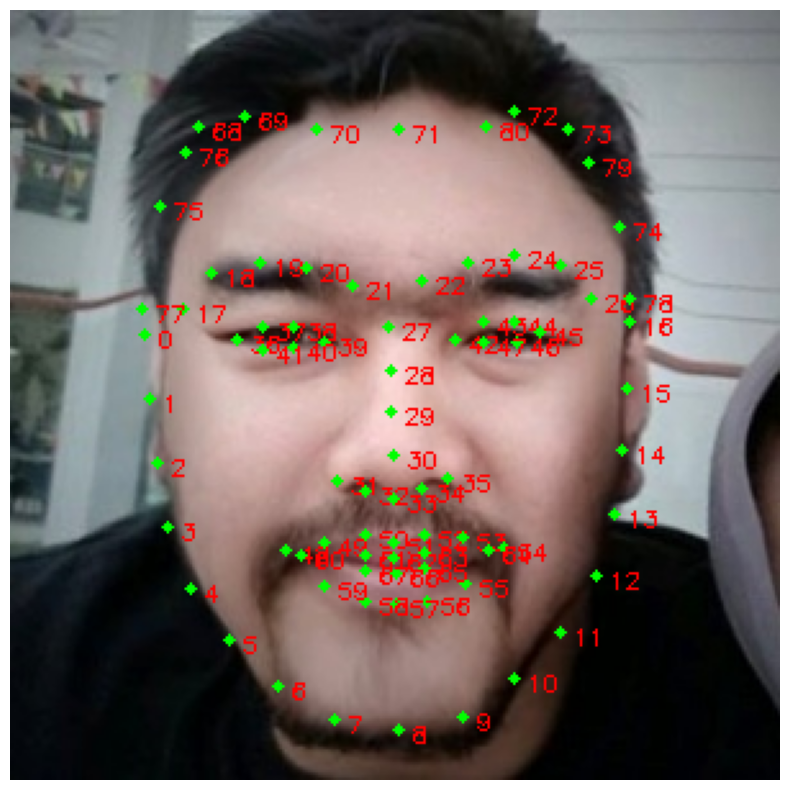

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the model from the .h5 file
model = load_model('Arvigo_Landmark81_coba_v1.h5')

# Read and preprocess the new image
new_image = cv2.imread('1542271514810.jpeg')
new_image_gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
new_image_norm = new_image_gray / 255.0
new_image_norm = np.expand_dims(new_image_norm, axis=0)
new_image_norm = np.expand_dims(new_image_norm, axis=-1)

# Perform prediction on the new image
predictions = model.predict(new_image_norm)

# Extract the predicted landmark coordinates
landmarks = predictions.reshape(-1, 2)

# Draw landmarks on the image with index
for i, landmark in enumerate(landmarks):
    x, y = landmark
    cv2.circle(new_image, (int(x), int(y)), 2, (0, 255, 0), -1)
    cv2.putText(new_image, str(i), (int(x) + 5, int(y) + 5), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)

# Display the image with landmarks
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
import os

# Nama file model
file_name = 'Arvigo_Landmark81_coba_v1.h5'

# Mendapatkan ukuran file dalam bytes
file_size = os.path.getsize(file_name)

# Mengonversi ukuran file ke dalam satuan yang lebih mudah dibaca
def convert_size(size_bytes):
    if size_bytes == 0:
        return "0B"
    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    size = round(size_bytes / p, 2)
    return f"{size} {size_name[i]}"

# Menampilkan ukuran file
print("Ukuran file:", convert_size(file_size))

Ukuran file: 920.82 MB


In [ ]:
from google.colab import files
files.download('/content/Arvigo_Landmark81_coba_v1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('/content/Arvigo_Landmark81_coba_v1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('/content/Arvigo_Landmark81_coba_v1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>